In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1) Plot training loss v/s epochs and validation loss v/s epochs for activations simgoid, ReLU, tanh and linear (default learning rate). Which is the best activation function? Give analysis and comparison for each.

In [2]:
import pandas as pd
import numpy as np
import tensorflow
from keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print(np.isnan(np.sum(X_train)))

False


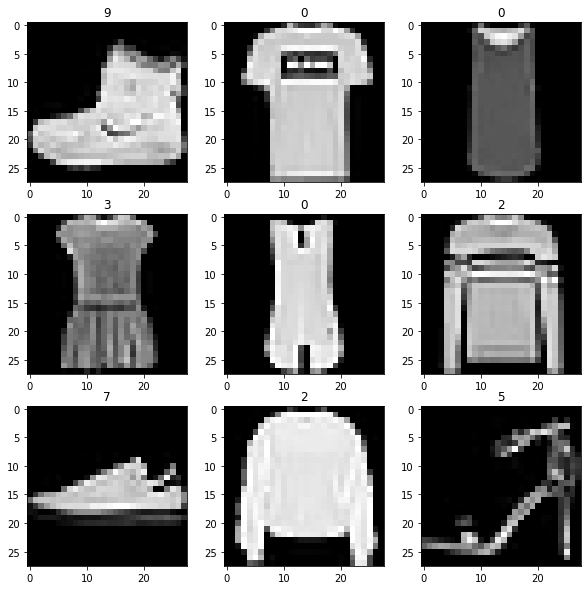

In [8]:
import matplotlib.pyplot as plt

def plot_images(X_train, y_train):
    fig, ax = plt.subplots(3, 3, figsize=(10, 10))
    for i in range(3):
        for j in range(3):
            ax[i, j].imshow(X_train[i * 3 + j], cmap='gray')
            ax[i, j].set_title(y_train[i * 3 + j])
    plt.show()

plot_images(X_train, y_train)

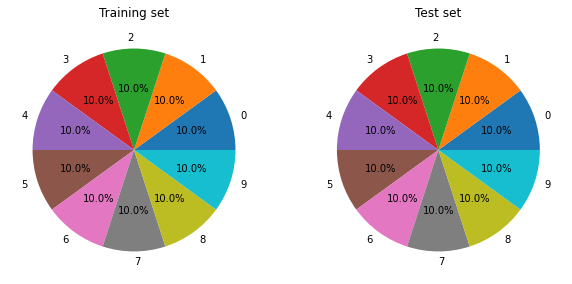

In [7]:
import matplotlib.pyplot as plt

def plot_piechart(y_train, y_test):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].pie([np.sum(y_train == i) for i in range(10)], labels=[str(i) for i in range(10)], autopct='%1.1f%%')
    ax[0].set_title('Training set')
    ax[1].pie([np.sum(y_test == i) for i in range(10)], labels=[str(i) for i in range(10)], autopct='%1.1f%%')
    ax[1].set_title('Test set')
    plt.show()

plot_piechart(y_train, y_test)

In [4]:
print(X_test[0])
print(X_test[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=0)
print(X_train.shape)
print(X_val.shape)

(51000, 28, 28)
(9000, 28, 28)


In [7]:
tr,tx,ty= X_train.shape
X_train = X_train.reshape(tr,tx*ty)
print(X_train.shape)
tv,tx,ty= X_val.shape
X_val = X_val.reshape(tv,tx*ty)
print(X_val.shape)
tt,tx,ty= X_test.shape
X_test = X_test.reshape(tt,tx*ty)
print(X_test.shape)

(51000, 784)
(9000, 784)
(10000, 784)


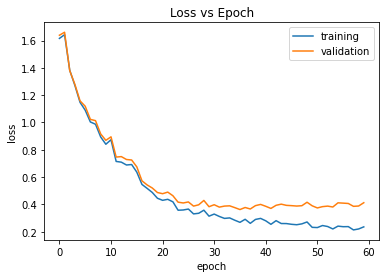

0.8752222222222222
0.9126862745098039


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np
mlp=MLPClassifier(hidden_layer_sizes=(256,32),max_iter=1,random_state=0)
training_loss=[]
validation_loss=[]
for i in range(60):
  mini=0
  rand=np.random.permutation(51000)
  while mini<51000:
    indices=rand[mini:mini+256]
    mlp.partial_fit(X_train[indices],y_train[indices],classes=np.unique(y_train))
    mini+=256
  training_loss.append(log_loss(y_train,mlp.predict_proba(X_train)))
  validation_loss.append(log_loss(y_val,mlp.predict_proba(X_val)))
plt.plot(training_loss)
plt.plot(validation_loss)
plt.legend(['training','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs Epoch')
plt.show()
print(mlp.score(X_val,y_val))
print(mlp.score(X_train,y_train))

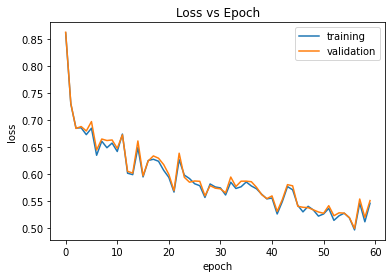

0.803
0.8017450980392157


In [11]:
mlp=MLPClassifier(hidden_layer_sizes=(256,32),max_iter=1,random_state=0,activation='logistic')
training_loss=[]
validation_loss=[]
for i in range(60):
    mini=0
    rand=np.random.permutation(51000)
    while mini<51000:
        indices=rand[mini:mini+256]
        mlp.partial_fit(X_train[indices],y_train[indices],classes=np.unique(y_train))
        mini+=256
    training_loss.append(log_loss(y_train,mlp.predict_proba(X_train)))
    validation_loss.append(log_loss(y_val,mlp.predict_proba(X_val)))
plt.plot(training_loss)
plt.plot(validation_loss)
plt.legend(['training','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs Epoch')
plt.show()
print(mlp.score(X_val,y_val))
print(mlp.score(X_train,y_train))

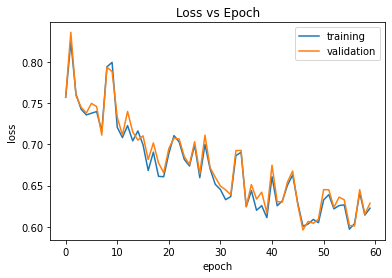

0.7618888888888888
0.7661568627450981


In [12]:
mlp=MLPClassifier(hidden_layer_sizes=(256,32),max_iter=1,random_state=0,activation='tanh')
training_loss=[]
validation_loss=[]
for i in range(60):
    mini=0
    rand=np.random.permutation(51000)
    while mini<51000:
        indices=rand[mini:mini+256]
        mlp.partial_fit(X_train[indices],y_train[indices],classes=np.unique(y_train))
        mini+=256
    training_loss.append(log_loss(y_train,mlp.predict_proba(X_train)))
    validation_loss.append(log_loss(y_val,mlp.predict_proba(X_val)))
plt.plot(training_loss)
plt.plot(validation_loss)
plt.legend(['training','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs Epoch')
plt.show()
print(mlp.score(X_val,y_val))
print(mlp.score(X_train,y_train))

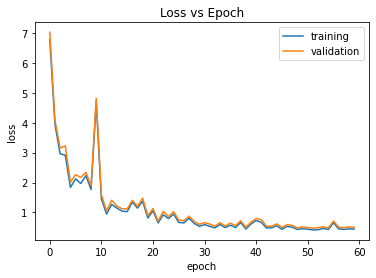

0.839
0.8499803921568627


In [13]:
mlp=MLPClassifier(hidden_layer_sizes=(256,32),max_iter=1,random_state=0,activation='identity')
training_loss=[]
validation_loss=[]
for i in range(60):
    mini=0
    rand=np.random.permutation(51000)
    while mini<51000:
        indices=rand[mini:mini+256]
        mlp.partial_fit(X_train[indices],y_train[indices],classes=np.unique(y_train))
        mini+=256
    training_loss.append(log_loss(y_train,mlp.predict_proba(X_train)))
    validation_loss.append(log_loss(y_val,mlp.predict_proba(X_val)))
plt.plot(training_loss)
plt.plot(validation_loss)
plt.legend(['training','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs Epoch')
plt.show()
print(mlp.score(X_val,y_val))
print(mlp.score(X_train,y_train))

# 2) Using the best activation function obtained above, train models using learning rates [0.1, 0.01, 0.001]. Plot training loss v/s epochs and validation loss v/s epochs. Which is the best learning rate? Give explanations of the results obtained for each learning rate.

For learning rate 0.1


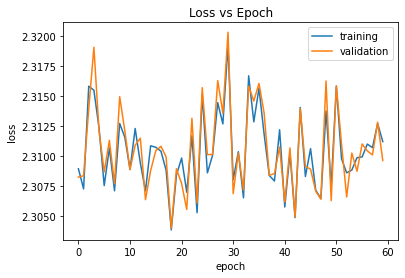

0.10077777777777777
0.09986274509803922
For learning rate 0.01


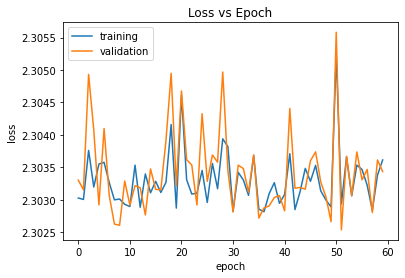

0.09766666666666667
0.10041176470588235
For learning rate 0.001


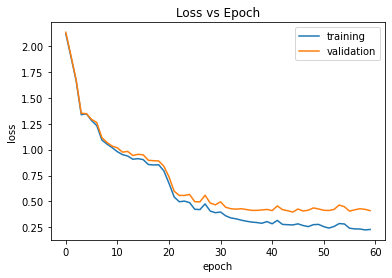

0.8826666666666667
0.9184509803921569


In [16]:
learning_rate=[0.1,0.01,0.001]
for i in learning_rate:
    mlp=MLPClassifier(hidden_layer_sizes=(256,32),max_iter=1,random_state=0,activation='relu',learning_rate_init=i)
    training_loss=[]
    validation_loss=[]
    print("For learning rate",i)
    for i in range(60):
        mini=0
        rand=np.random.permutation(51000)
        while mini<51000:
            indices=rand[mini:mini+256]
            mlp.partial_fit(X_train[indices],y_train[indices],classes=np.unique(y_train))
            mini+=256
        training_loss.append(log_loss(y_train,mlp.predict_proba(X_train)))
        validation_loss.append(log_loss(y_val,mlp.predict_proba(X_val)))
    plt.plot(training_loss)
    plt.plot(validation_loss)
    plt.legend(['training','validation'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs Epoch')
    plt.show()
    print(mlp.score(X_val,y_val))
    print(mlp.score(X_train,y_train))

# 3) Decrease the number of neurons in each layer to various values. What do you observe? Plot training loss v/s epochs. Justify your answer.

For the number of neurons as (200, 32)


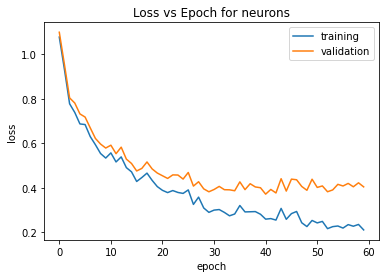

0.8827777777777778
0.9258823529411765
For the number of neurons as (128, 16)


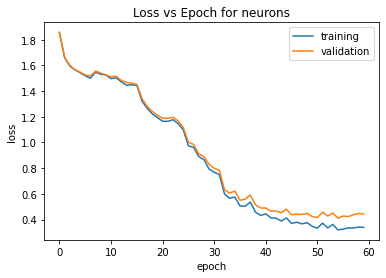

0.8517777777777777
0.8694901960784314
For the number of neurons as (64, 8)


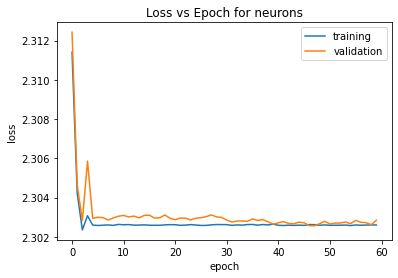

0.09566666666666666
0.10076470588235294
For the number of neurons as (32, 4)


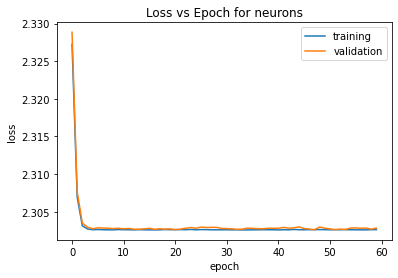

0.10077777777777777
0.09986274509803922
For the number of neurons as (16, 2)


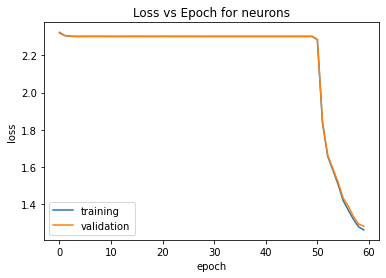

0.4703333333333333
0.4792549019607843


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np
neurons=[(200,32),(128,16),(64,8),(32,4),(16,2)]
for nota in neurons:
    mlp=MLPClassifier(hidden_layer_sizes=nota,max_iter=1,random_state=0,activation='relu')
    training_loss=[]
    validation_loss=[]
    for i in range(60):
        mini=0
        rand=np.random.permutation(51000)
        while mini<51000:
            indices=rand[mini:mini+256]
            mlp.partial_fit(X_train[indices],y_train[indices],classes=np.unique(y_train))
            mini+=256
        training_loss.append(log_loss(y_train,mlp.predict_proba(X_train)))
        validation_loss.append(log_loss(y_val,mlp.predict_proba(X_val)))
    print("For the number of neurons as",nota)
    plt.plot(training_loss)
    plt.plot(validation_loss)
    plt.legend(['training','validation'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs Epoch for neurons')
    plt.show()
    print(mlp.score(X_val,y_val))
    print(mlp.score(X_train,y_train))

# 4) Perform grid search on appropriate parameters of MLPClassifier. Choose the best parameters. Give an analysis of why you might have got those parameters.

In [10]:
from sklearn.model_selection import GridSearchCV

mlp=MLPClassifier(random_state=0,early_stopping=True,max_iter=100)
param_grid = {
    'learning_rate_init': [0.001,0.002,0.0005],
    'tol': [1e-4,1e-5,1e-3],
    'alpha': [0.0001,0.0002,0.00005],
}
grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid,n_jobs=-1, cv = 3, verbose = 2,refit=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_val,y_val))
print(grid_search.score(X_test,y_test))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'alpha': 0.0001, 'learning_rate_init': 0.0005, 'tol': 0.0001}
0.8583529411764705
MLPClassifier(early_stopping=True, learning_rate_init=0.0005, max_iter=100,
              random_state=0)
0.8922156862745098
0.8672222222222222
0.8562
